# Exploratory Analysis of the Data

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import statistics as stats
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import scipy.stats as ss
import statistics as stats
import seaborn as sns 
from pandas.plotting import autocorrelation_plot

## Maximum and minimum identification

We upload the csv first of all, eliminating the column 'Unnamed: 0', later we print the total shape of the the csv. We therefore print the names of the final columns present in the data. We also delete all the columns tht didnt have numbers.

In [36]:
data = pd.read_csv("pacientes_progresores_2021.csv")
patient_data= data.drop(['Unnamed: 0','sexo','diabetes','estatus_glucemico_inicio','estatus_glucemico_final','progresores'], axis=1) 
print(patient_data.shape)

(2016, 21)


In [41]:
patient_data.columns
columns = list(patient_data.columns)
#columns

In order to see theminimum and the maximum of each variable, we use the .describe() command. 

In [38]:
patient_data.describe()

,edad,peso,talla,IMC,TAS,TAD,LDL,HDL,trigl,Hbglic,...,creat,cist,PCR,Epi.creat,Epi.cist,evento.cv,mortalidad,num_farmacos,hemoglobina_glic,glucemia
count,2016.000000,2016.00000,2016.000000,2016.000000,2016.000000,2016.000000,1983.000000,1993.000000,2012.000000,1725.000000,...,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,1725.000000,2013.000000
mean,56.022321,83.00754,162.735615,31.264633,141.324901,79.782242,132.922844,63.575013,178.102386,6.335826,...,0.808621,0.799420,11.909385,91.561456,101.020838,0.093254,0.048611,2.247520,5.979380,107.696970
std,13.976797,16.82021,10.187865,5.586401,13.875522,9.038528,32.676805,17.433854,120.429645,1.247909,...,0.227685,0.237714,20.909949,21.620870,24.089212,0.290860,0.215107,1.331334,0.927053,30.216853
min,14.000000,45.00000,136.000000,16.800000,104.000000,53.000000,42.000000,6.000000,26.000000,4.000000,...,0.300000,0.300000,0.800000,20.932130,21.651041,0.000000,0.000000,0.000000,3.130000,2.000000
25%,48.000000,71.00000,155.000000,27.500000,132.000000,74.000000,111.000000,51.000000,108.750000,5.600000,...,0.700000,0.650000,3.440000,78.081601,87.186610,0.000000,0.000000,1.000000,5.500000,91.000000
50%,57.000000,81.00000,162.000000,30.400000,141.000000,80.000000,132.000000,61.000000,147.500000,5.900000,...,0.800000,0.740000,5.615000,94.963884,105.872386,0.000000,0.000000,2.000000,5.700000,100.000000
75%,65.000000,92.00000,170.000000,34.000000,149.000000,85.000000,153.000000,73.000000,208.000000,6.500000,...,0.900000,0.890000,11.400000,106.379386,116.993151,0.000000,0.000000,3.000000,6.200000,114.000000
max,90.000000,166.00000,195.000000,59.200000,246.000000,124.000000,276.000000,168.000000,1600.000000,13.400000,...,2.300000,2.400000,344.000000,155.998737,174.177895,1.000000,1.000000,7.000000,13.400000,436.000000


In [39]:
patient_data.describe()['edad'][['min','max']]

min    14.0
max    90.0
Name: edad, dtype: float64

A list with maximum and minimum values was created, using the columns with the numeric values (the non-numeric values were deleted). Every variables maximum, minimum and data is associated to an element in the list. 

In [47]:
max_min_list=[]
for el in columns:
    max_min_list.append(patient_data.describe()[el][['min','max']])

In [50]:
max_min_list[1]

min     45.0
max    166.0
Name: peso, dtype: float64

## Outliers identification using boxplots. 

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. Boxplot will be used in order to identify them. 

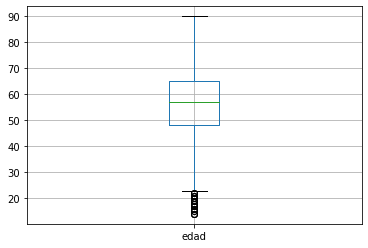

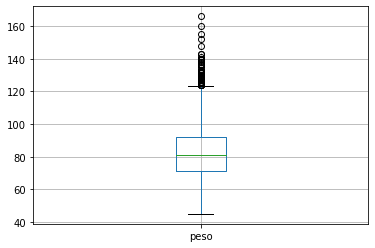

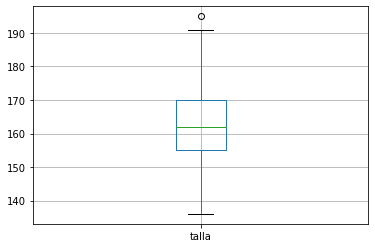

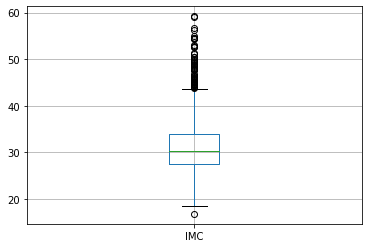

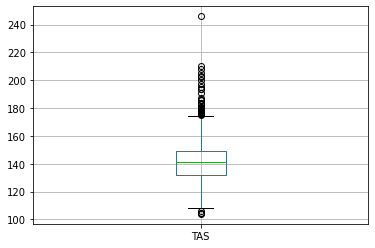

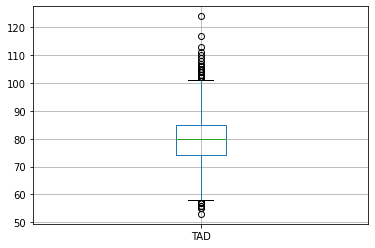

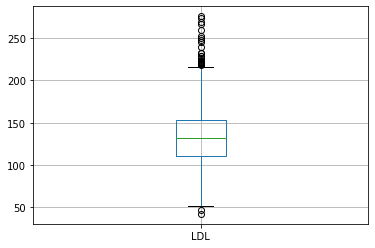

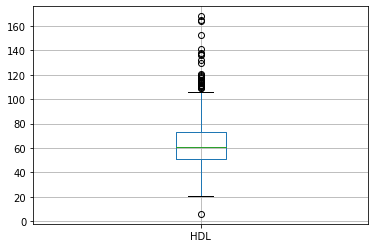

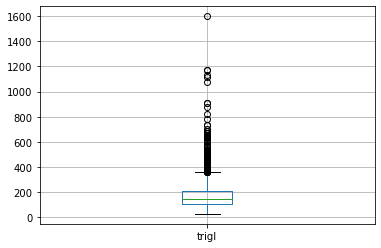

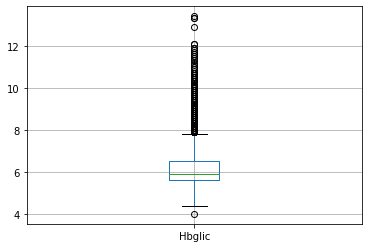

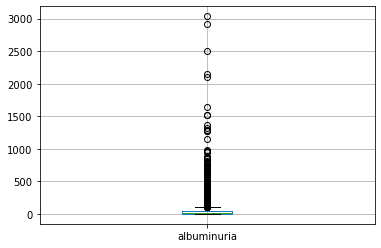

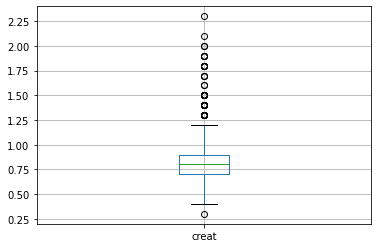

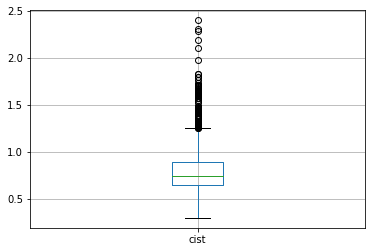

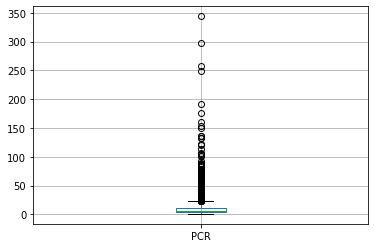

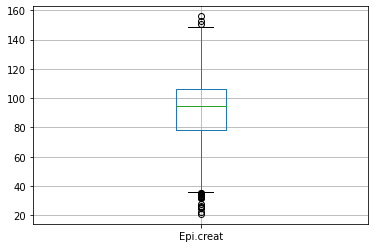

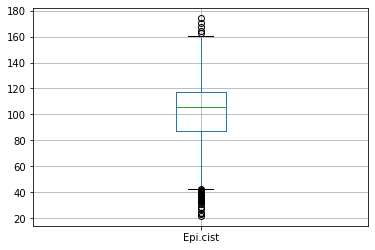

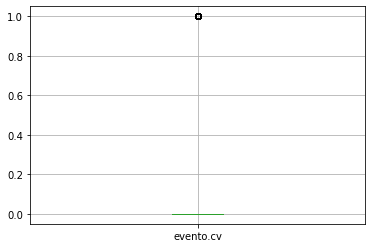

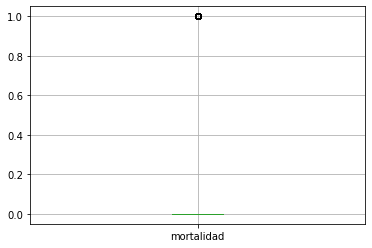

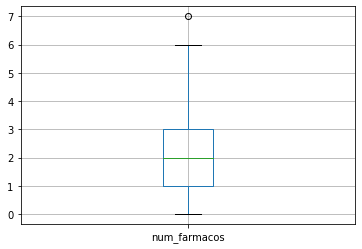

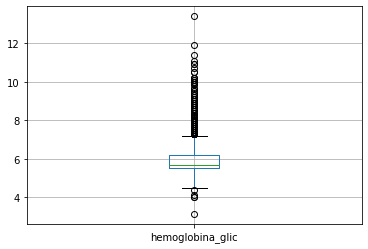

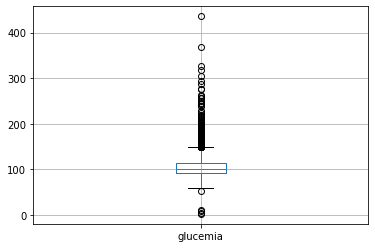

In [51]:
for i in columns:
    patient_data.boxplot(column=i)
    plt.show()